# MTH5 observations during geomagnetic storms 

This example shows how to extract MTH5 data for multiple geomagnetic storms in 2015.  

# DST index
Obtain Dst index for the whole year using pyspedas

11-Jul-24 22:34:33: Time clip returns full data set.
11-Jul-24 22:34:33: **************************************************************************************
11-Jul-24 22:34:33: The DST data are provided by the World Data Center for Geomagnetism, Kyoto, and
11-Jul-24 22:34:33:  are not for redistribution (http://wdc.kugi.kyoto-u.ac.jp/). Furthermore, we thank
11-Jul-24 22:34:33:  the geomagnetic observatories (Kakioka [JMA], Honolulu and San Juan [USGS], Hermanus
11-Jul-24 22:34:33:  [RSA], Alibag [IIG]), NiCT, INTERMAGNET, and many others for their cooperation to
11-Jul-24 22:34:33:  make the Dst index available.
11-Jul-24 22:34:33: **************************************************************************************


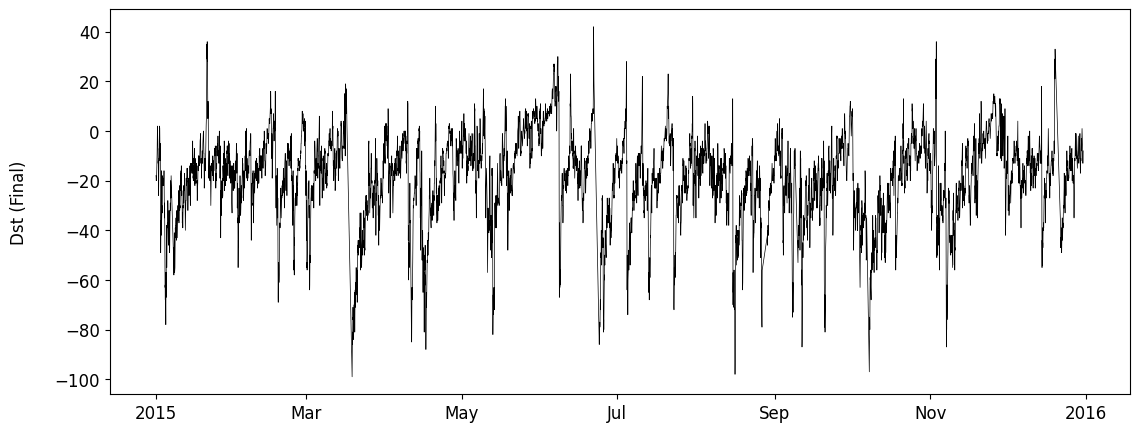

In [25]:
import pyspedas, pytplot
pyspedas.projects.kyoto.dst(trange=['2015-01-01', '2016-01-01'])
pytplot.tplot('kyoto_dst')

Select strong geomagnetic storms that are at least 3 days apart  

In [26]:
import numpy as np
dst_time, dst_data = pytplot.get_data('kyoto_dst')
dst_index = np.array(dst_data)

# Identify local minima
local_minima_indices = (np.diff(np.sign(np.diff(dst_index))) > 0).nonzero()[0] + 1

# Filter local minima that are less than -80 nT
filtered_minima_indices = local_minima_indices[dst_index[local_minima_indices] < -80]
filtered_minima_time = dst_time[filtered_minima_indices]
filtered_minima_dst = dst_index[filtered_minima_indices]

# Make sure that the storms are at least 3 days apart
filtered_minima_time_diff = np.diff(filtered_minima_time) < 259200  # 3 days in seconds
daily_min_found = False

# Iterate through the time differences and update filtered_minima_time accordingly
for i in range(len(filtered_minima_time_diff)):    
    if filtered_minima_time_diff[i]:  # If the current minima is within 3 days of the previous one
        if filtered_minima_time[i] > filtered_minima_time[i + 1] or daily_min_found:
            filtered_minima_time[i] = -1  # Mark current minima as invalid
        else:
            daily_min_found = True  # Mark that a minima within 3 days was found
    elif daily_min_found:
        filtered_minima_time[i] = -1  # Mark current minima as invalid
        daily_min_found = False
    else:
        daily_min_found = False

# Filter out the invalid minima
valid_minima_indices = filtered_minima_time != -1
filtered_minima_dst = filtered_minima_dst[valid_minima_indices]
filtered_minima_time = filtered_minima_time[valid_minima_indices]

print(f"{len(filtered_minima_dst)} Storms: ")
for  t, d in zip(filtered_minima_time, filtered_minima_dst):
    print(pytplot.time_string(t), d)

10 Storms: 
2015-03-19 00:30:00.000000 -99.0
2015-04-11 07:30:00.000000 -83.0
2015-04-16 07:30:00.000000 -81.0
2015-05-13 06:30:00.000000 -82.0
2015-06-24 00:30:00.000000 -86.0
2015-08-16 07:30:00.000000 -98.0
2015-09-11 14:30:00.000000 -87.0
2015-09-20 15:30:00.000000 -81.0
2015-10-08 00:30:00.000000 -97.0
2015-11-07 06:30:00.000000 -87.0


With selected storms search for available MTH5 data within -1 and +3 days from the minimum Dst.

In this example, we will limit the number the networks to the fist available and the number of stations to 5 randomly selected. 

2024-07-11T22:34:36.636677-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_TNV48.h5 in mode w
2024-07-11T22:34:38.557186-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:34:38.588187-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:34:39.321421-0700 | INFO | mth5.groups.base | _add_group | RunGroup c already exists, returning existing group.
2024-07-11T22:34:39.351424-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:34:39.389378-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:34:39.426417-0700 | INFO | mth5.groups.base | _add_group | RunGroup c already exists, returning existing group.
2024-07-11T22:34:40.110428-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Da

11-Jul-24 22:34:40: Creating cached c:\work\Data\SPEDAS\mth5\4P_TNV48_1435019400.0_1435365000.0.h5


2024-07-11T22:34:43.091637-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_TNV48_1435019400.0_1435365000.0.h5
2024-07-11T22:34:43.439223-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_TNU48.h5 in mode w
2024-07-11T22:34:46.623333-0700 | CRITICAL | mth5.groups.run | update_metadata | There maybe no channels associated with this run -- setting sample_rate to 0
2024-07-11T22:34:46.633331-0700 | CRITICAL | mth5.groups.run | update_metadata | There maybe no channels associated with this run -- setting sample_rate to 0
2024-07-11T22:34:46.645283-0700 | CRITICAL | mth5.groups.run | update_metadata | There maybe no channels associated with this run -- setting sample_rate to 0
2024-07-11T22:34:46.905435-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:34:46.920387-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, ret

11-Jul-24 22:34:47: Creating cached c:\work\Data\SPEDAS\mth5\4P_TNU48_1435019400.0_1435365000.0.h5


2024-07-11T22:34:49.599028-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_TNU48_1435019400.0_1435365000.0.h5
2024-07-11T22:34:49.956512-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_GAW50.h5 in mode w
2024-07-11T22:34:53.820673-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:34:53.854673-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:34:53.889675-0700 | INFO | mth5.groups.base | _add_group | RunGroup c already exists, returning existing group.
2024-07-11T22:34:54.644149-0700 | INFO | mth5.groups.base | _add_group | RunGroup d already exists, returning existing group.
2024-07-11T22:34:54.680203-0700 | INFO | mth5.groups.base | _add_group | RunGroup e already exists, returning existing group.
2024-07-11T22:34:54.744203-0700 | INFO | mth5.mth5 | close_mth5 | Flushin

11-Jul-24 22:34:54: Creating cached c:\work\Data\SPEDAS\mth5\4P_GAW50_1435019400.0_1435365000.0.h5


2024-07-11T22:34:56.948045-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_GAW50_1435019400.0_1435365000.0.h5
2024-07-11T22:34:57.364546-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_REP47.h5 in mode w
2024-07-11T22:35:01.252665-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:35:01.291641-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:35:01.324641-0700 | INFO | mth5.groups.base | _add_group | RunGroup c already exists, returning existing group.
2024-07-11T22:35:02.085691-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_REP47.h5


11-Jul-24 22:35:02: Creating cached c:\work\Data\SPEDAS\mth5\4P_REP47_1435019400.0_1435365000.0.h5


2024-07-11T22:35:04.050185-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_REP47_1435019400.0_1435365000.0.h5
2024-07-11T22:35:04.402339-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_RET46.h5 in mode w
2024-07-11T22:35:07.492144-0700 | CRITICAL | mth5.groups.run | update_metadata | There maybe no channels associated with this run -- setting sample_rate to 0
2024-07-11T22:35:07.503193-0700 | CRITICAL | mth5.groups.run | update_metadata | There maybe no channels associated with this run -- setting sample_rate to 0
2024-07-11T22:35:07.594209-0700 | CRITICAL | mth5.groups.run | update_metadata | There maybe no channels associated with this run -- setting sample_rate to 0
2024-07-11T22:35:07.955589-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:35:07.972527-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, ret

11-Jul-24 22:35:09: Creating cached c:\work\Data\SPEDAS\mth5\4P_RET46_1435019400.0_1435365000.0.h5


2024-07-11T22:35:12.605860-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_RET46_1435019400.0_1435365000.0.h5
Storm 2015-06-24 00:30:00.000000, minimum Dst: -86.0; MTH5 network 4P, stations ['TNV48', 'TNU48', 'GAW50', 'REP47', 'RET46']


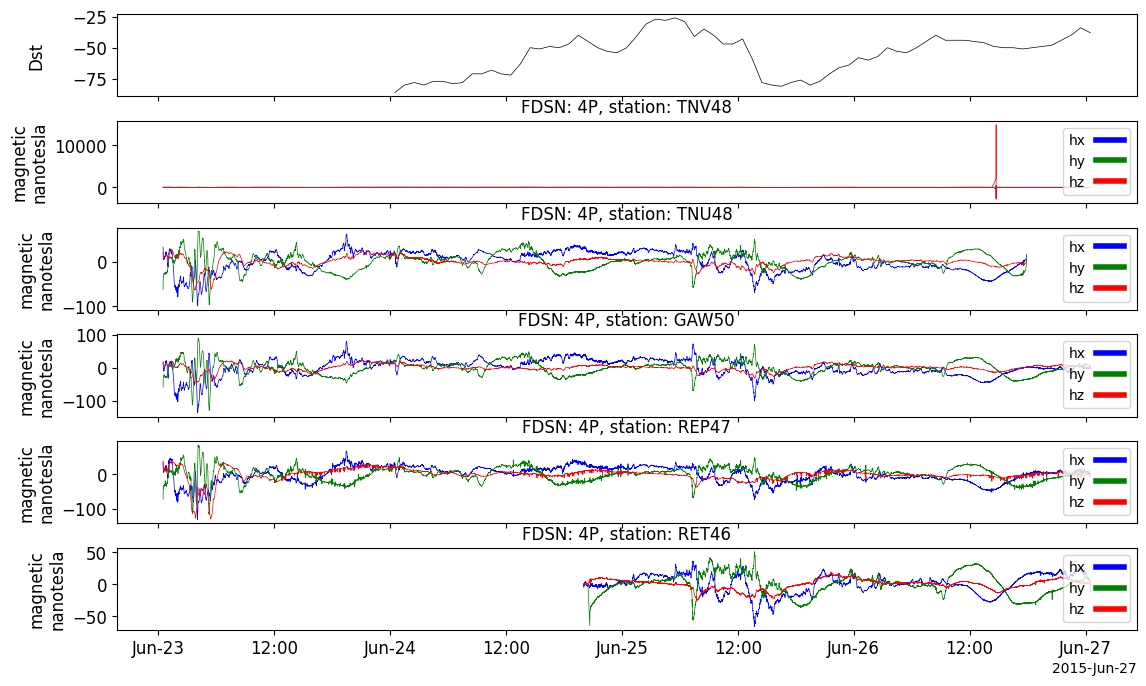

2024-07-11T22:35:15.685304-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_TNV51.h5 in mode w
2024-07-11T22:35:18.386956-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:35:18.421905-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:35:18.458936-0700 | INFO | mth5.groups.base | _add_group | RunGroup c already exists, returning existing group.
2024-07-11T22:35:19.220942-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_TNV51.h5


11-Jul-24 22:35:19: Creating cached c:\work\Data\SPEDAS\mth5\4P_TNV51_1439623800.0_1439969400.0.h5


2024-07-11T22:35:21.130885-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_TNV51_1439623800.0_1439969400.0.h5
2024-07-11T22:35:21.482476-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_TNV50.h5 in mode w
2024-07-11T22:35:25.098491-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:35:25.133538-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:35:25.172054-0700 | INFO | mth5.groups.base | _add_group | RunGroup c already exists, returning existing group.
2024-07-11T22:35:25.206054-0700 | INFO | mth5.groups.base | _add_group | RunGroup e already exists, returning existing group.
2024-07-11T22:35:26.065561-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_TNV50.h5


11-Jul-24 22:35:26: Creating cached c:\work\Data\SPEDAS\mth5\4P_TNV50_1439623800.0_1439969400.0.h5


2024-07-11T22:35:28.158710-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_TNV50_1439623800.0_1439969400.0.h5
2024-07-11T22:35:28.527757-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_GAY53.h5 in mode w
2024-07-11T22:35:32.328749-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:35:32.364702-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:35:33.096219-0700 | INFO | mth5.groups.base | _add_group | RunGroup c already exists, returning existing group.
2024-07-11T22:35:33.130223-0700 | INFO | mth5.groups.base | _add_group | RunGroup o already exists, returning existing group.
2024-07-11T22:35:33.190178-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_GAY53.h5


11-Jul-24 22:35:33: Creating cached c:\work\Data\SPEDAS\mth5\4P_GAY53_1439623800.0_1439969400.0.h5


2024-07-11T22:35:35.201708-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_GAY53_1439623800.0_1439969400.0.h5
2024-07-11T22:35:35.556719-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_TNT52.h5 in mode w
2024-07-11T22:35:38.829214-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:35:38.869730-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:35:38.904694-0700 | INFO | mth5.groups.base | _add_group | RunGroup d already exists, returning existing group.
2024-07-11T22:35:39.614810-0700 | INFO | mth5.groups.base | _add_group | RunGroup x already exists, returning existing group.
2024-07-11T22:35:39.672817-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_TNT52.h5


11-Jul-24 22:35:39: Creating cached c:\work\Data\SPEDAS\mth5\4P_TNT52_1439623800.0_1439969400.0.h5


2024-07-11T22:35:41.461704-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_TNT52_1439623800.0_1439969400.0.h5
2024-07-11T22:35:41.808009-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_TNU51.h5 in mode w
2024-07-11T22:35:44.786747-0700 | CRITICAL | mth5.groups.run | update_metadata | There maybe no channels associated with this run -- setting sample_rate to 0
2024-07-11T22:35:44.796749-0700 | CRITICAL | mth5.groups.run | update_metadata | There maybe no channels associated with this run -- setting sample_rate to 0
2024-07-11T22:35:45.467805-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:35:45.485810-0700 | INFO | mth5.groups.base | _add_group | RunGroup c already exists, returning existing group.
2024-07-11T22:35:45.508759-0700 | INFO | mth5.groups.base | _add_group | RunGroup d already exists, returning existing group.
2024-07-1

11-Jul-24 22:35:46: Creating cached c:\work\Data\SPEDAS\mth5\4P_TNU51_1439623800.0_1439969400.0.h5


2024-07-11T22:35:48.226569-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_TNU51_1439623800.0_1439969400.0.h5
Storm 2015-08-16 07:30:00.000000, minimum Dst: -98.0; MTH5 network 4P, stations ['TNV51', 'TNV50', 'GAY53', 'TNT52', 'TNU51']


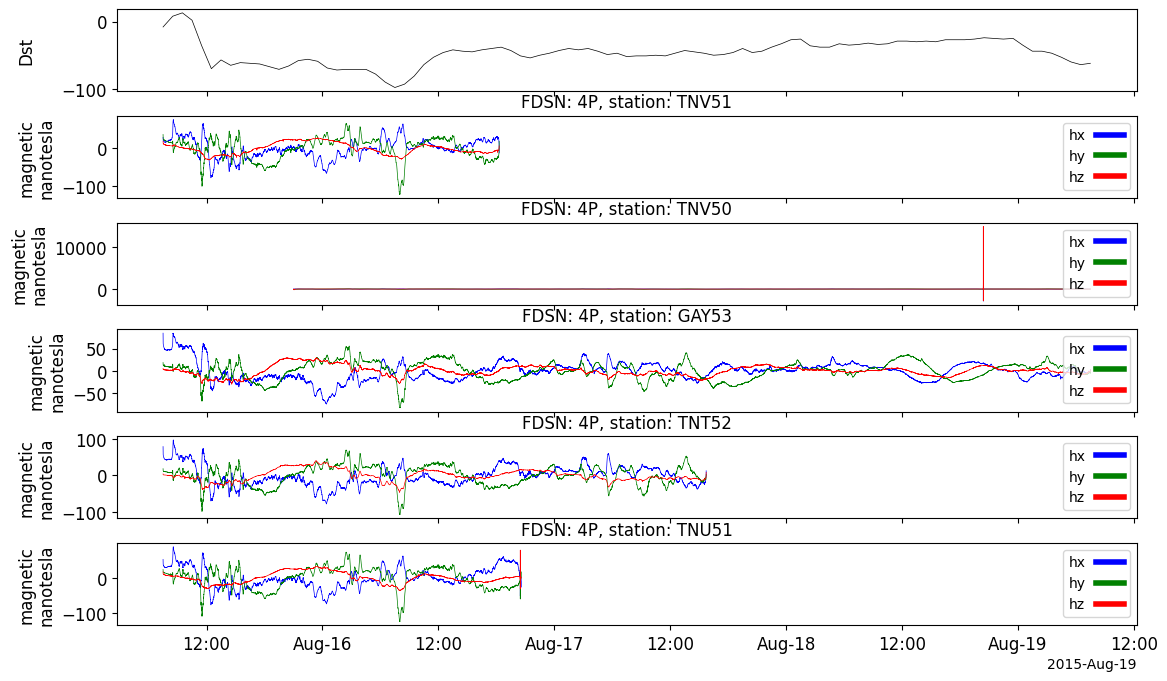

2024-07-11T22:35:50.883516-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_GAZ54.h5 in mode w
2024-07-11T22:35:53.612114-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:35:53.655111-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:35:54.513211-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_GAZ54.h5


11-Jul-24 22:35:54: Creating cached c:\work\Data\SPEDAS\mth5\4P_GAZ54_1441895400.0_1442241000.0.h5


2024-07-11T22:35:56.325959-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_GAZ54_1441895400.0_1442241000.0.h5
2024-07-11T22:35:56.664387-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_FLC56.h5 in mode w
2024-07-11T22:35:59.034216-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:35:59.065219-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:35:59.782781-0700 | INFO | mth5.groups.base | _add_group | RunGroup c already exists, returning existing group.
2024-07-11T22:35:59.813786-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:35:59.846794-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:35:59.879786-0700 | INFO | mth5.groups.base | _add_group | 

11-Jul-24 22:36:00: Creating cached c:\work\Data\SPEDAS\mth5\4P_FLC56_1441895400.0_1442241000.0.h5


2024-07-11T22:36:03.879579-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_FLC56_1441895400.0_1442241000.0.h5
2024-07-11T22:36:04.262627-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_GAB53.h5 in mode w
2024-07-11T22:36:06.975821-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:36:07.007831-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:36:07.991394-0700 | INFO | mth5.groups.base | _add_group | RunGroup c already exists, returning existing group.
2024-07-11T22:36:08.030943-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:36:08.098906-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:36:08.160905-0700 | INFO | mth5.groups.base | _add_group | 

11-Jul-24 22:36:09: Creating cached c:\work\Data\SPEDAS\mth5\4P_GAB53_1441895400.0_1442241000.0.h5


2024-07-11T22:36:12.572778-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_GAB53_1441895400.0_1442241000.0.h5
2024-07-11T22:36:12.967337-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_GAB54.h5 in mode w
2024-07-11T22:36:15.082447-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:36:15.115444-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:36:15.873538-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_GAB54.h5


11-Jul-24 22:36:15: Creating cached c:\work\Data\SPEDAS\mth5\4P_GAB54_1441895400.0_1442241000.0.h5


2024-07-11T22:36:17.651235-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_GAB54_1441895400.0_1442241000.0.h5
2024-07-11T22:36:18.019146-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_GAW53.h5 in mode w
2024-07-11T22:36:21.479244-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:36:21.513366-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:36:22.533430-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_GAW53.h5


11-Jul-24 22:36:22: Creating cached c:\work\Data\SPEDAS\mth5\4P_GAW53_1441895400.0_1442241000.0.h5


2024-07-11T22:36:24.492534-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_GAW53_1441895400.0_1442241000.0.h5
Storm 2015-09-11 14:30:00.000000, minimum Dst: -87.0; MTH5 network 4P, stations ['GAZ54', 'FLC56', 'GAB53', 'GAB54', 'GAW53']


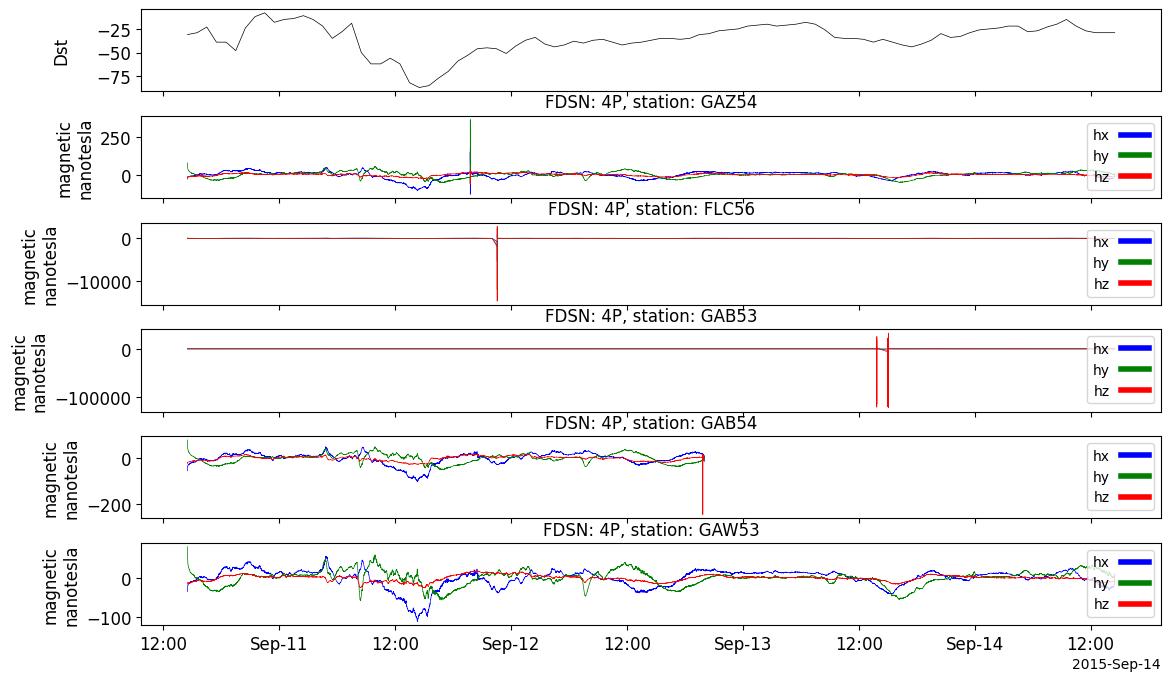

2024-07-11T22:36:28.958833-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_FLC56.h5 in mode w
2024-07-11T22:36:31.992100-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:36:32.024117-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:36:32.063052-0700 | INFO | mth5.groups.base | _add_group | RunGroup c already exists, returning existing group.
2024-07-11T22:36:32.874025-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_FLC56.h5


11-Jul-24 22:36:32: Creating cached c:\work\Data\SPEDAS\mth5\4P_FLC56_1442676600.0_1443022200.0.h5


2024-07-11T22:36:34.706588-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_FLC56_1442676600.0_1443022200.0.h5
2024-07-11T22:36:35.088175-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_GAA55.h5 in mode w
2024-07-11T22:36:39.407708-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:36:39.442708-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:36:40.453928-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_GAA55.h5


11-Jul-24 22:36:40: Creating cached c:\work\Data\SPEDAS\mth5\4P_GAA55_1442676600.0_1443022200.0.h5


2024-07-11T22:36:43.238244-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_GAA55_1442676600.0_1443022200.0.h5
2024-07-11T22:36:43.621281-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_GAB53.h5 in mode w
2024-07-11T22:36:47.156223-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:36:47.191222-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:36:47.226221-0700 | INFO | mth5.groups.base | _add_group | RunGroup c already exists, returning existing group.
2024-07-11T22:36:48.025316-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_GAB53.h5


11-Jul-24 22:36:48: Creating cached c:\work\Data\SPEDAS\mth5\4P_GAB53_1442676600.0_1443022200.0.h5


2024-07-11T22:36:50.044979-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_GAB53_1442676600.0_1443022200.0.h5
2024-07-11T22:36:50.486991-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_ALX49.h5 in mode w
2024-07-11T22:36:52.798531-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:36:53.492535-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:36:54.208153-0700 | INFO | mth5.groups.base | _add_group | RunGroup c already exists, returning existing group.
2024-07-11T22:36:54.271152-0700 | INFO | mth5.groups.base | _add_group | RunGroup d already exists, returning existing group.
2024-07-11T22:36:54.347149-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_ALX49.h5


11-Jul-24 22:36:54: Creating cached c:\work\Data\SPEDAS\mth5\4P_ALX49_1442676600.0_1443022200.0.h5


2024-07-11T22:36:57.318107-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_ALX49_1442676600.0_1443022200.0.h5
2024-07-11T22:36:57.670301-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_GAZ54.h5 in mode w
2024-07-11T22:37:00.034063-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:37:00.066022-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:37:00.747165-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_GAZ54.h5


11-Jul-24 22:37:00: Creating cached c:\work\Data\SPEDAS\mth5\4P_GAZ54_1442676600.0_1443022200.0.h5


2024-07-11T22:37:02.256929-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_GAZ54_1442676600.0_1443022200.0.h5
Storm 2015-09-20 15:30:00.000000, minimum Dst: -81.0; MTH5 network 4P, stations ['FLC56', 'GAA55', 'GAB53', 'ALX49', 'GAZ54']


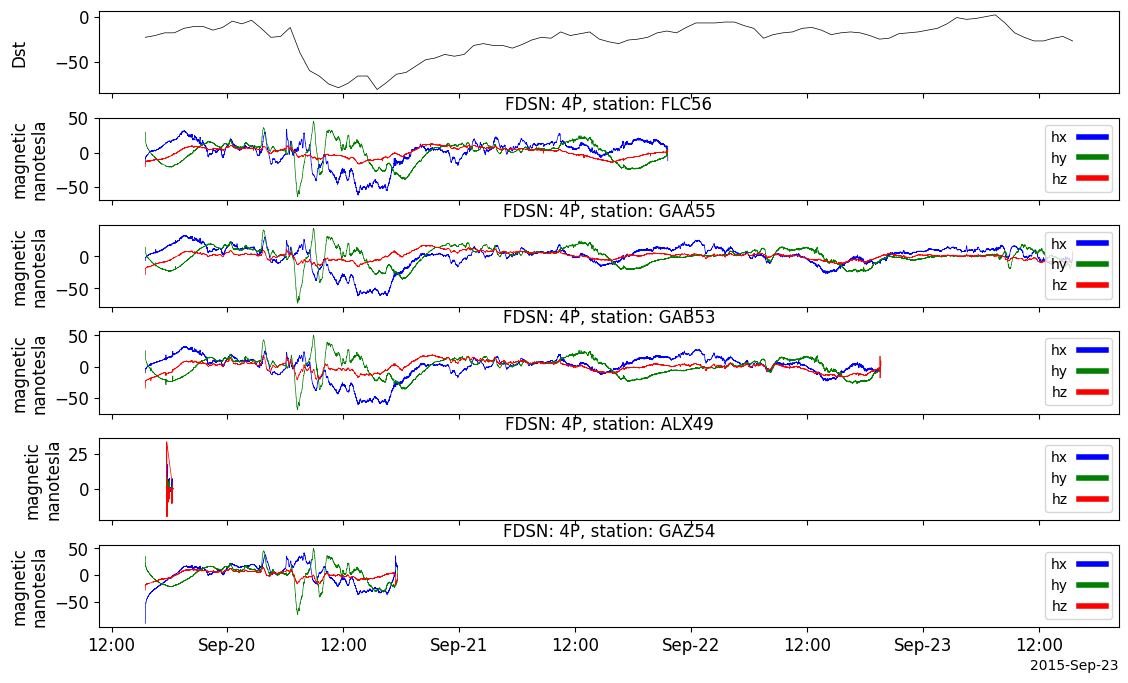

2024-07-11T22:37:04.775805-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_KYS51.h5 in mode w
2024-07-11T22:37:08.825662-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:37:08.866271-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:37:08.898271-0700 | INFO | mth5.groups.base | _add_group | RunGroup c already exists, returning existing group.
2024-07-11T22:37:09.673882-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_KYS51.h5


11-Jul-24 22:37:09: Creating cached c:\work\Data\SPEDAS\mth5\4P_KYS51_1444177800.0_1444523400.0.h5


2024-07-11T22:37:11.629611-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_KYS51_1444177800.0_1444523400.0.h5
2024-07-11T22:37:11.974626-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_SCV53.h5 in mode w
2024-07-11T22:37:15.378515-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:37:15.411515-0700 | INFO | mth5.groups.base | _add_group | RunGroup c already exists, returning existing group.
2024-07-11T22:37:16.044515-0700 | INFO | mth5.groups.base | _add_group | RunGroup d already exists, returning existing group.
2024-07-11T22:37:16.079511-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:37:16.115494-0700 | INFO | mth5.groups.base | _add_group | RunGroup c already exists, returning existing group.
2024-07-11T22:37:16.154507-0700 | INFO | mth5.groups.base | _add_group | 

11-Jul-24 22:37:16: Creating cached c:\work\Data\SPEDAS\mth5\4P_SCV53_1444177800.0_1444523400.0.h5


2024-07-11T22:37:20.199711-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_SCV53_1444177800.0_1444523400.0.h5
2024-07-11T22:37:20.548774-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_SCV55.h5 in mode w
2024-07-11T22:37:22.133874-0700 | CRITICAL | mth5.groups.run | update_metadata | There maybe no channels associated with this run -- setting sample_rate to 0
2024-07-11T22:37:22.664826-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:37:23.346145-0700 | INFO | mth5.groups.base | _add_group | RunGroup c already exists, returning existing group.
2024-07-11T22:37:23.385144-0700 | INFO | mth5.groups.base | _add_group | RunGroup d already exists, returning existing group.
2024-07-11T22:37:23.419152-0700 | INFO | mth5.groups.base | _add_group | RunGroup e already exists, returning existing group.
2024-07-11T22:37:23.454099-0700 | INFO | 

11-Jul-24 22:37:23: Creating cached c:\work\Data\SPEDAS\mth5\4P_SCV55_1444177800.0_1444523400.0.h5


2024-07-11T22:37:25.184886-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_SCV55_1444177800.0_1444523400.0.h5
2024-07-11T22:37:25.541791-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_SCW54.h5 in mode w
2024-07-11T22:37:27.729851-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:37:28.372900-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:37:29.074849-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_SCW54.h5


11-Jul-24 22:37:29: Creating cached c:\work\Data\SPEDAS\mth5\4P_SCW54_1444177800.0_1444523400.0.h5


2024-07-11T22:37:31.752164-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_SCW54_1444177800.0_1444523400.0.h5
2024-07-11T22:37:32.241192-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_SCW55.h5 in mode w
2024-07-11T22:37:35.253006-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:37:35.290008-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:37:35.333006-0700 | INFO | mth5.groups.base | _add_group | RunGroup c already exists, returning existing group.
2024-07-11T22:37:36.127087-0700 | INFO | mth5.groups.base | _add_group | RunGroup d already exists, returning existing group.
2024-07-11T22:37:36.165048-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:37:36.203048-0700 | INFO | mth5.groups.base | _add_group | 

11-Jul-24 22:37:37: Creating cached c:\work\Data\SPEDAS\mth5\4P_SCW55_1444177800.0_1444523400.0.h5


2024-07-11T22:37:40.421098-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_SCW55_1444177800.0_1444523400.0.h5
Storm 2015-10-08 00:30:00.000000, minimum Dst: -97.0; MTH5 network 4P, stations ['KYS51', 'SCV53', 'SCV55', 'SCW54', 'SCW55']


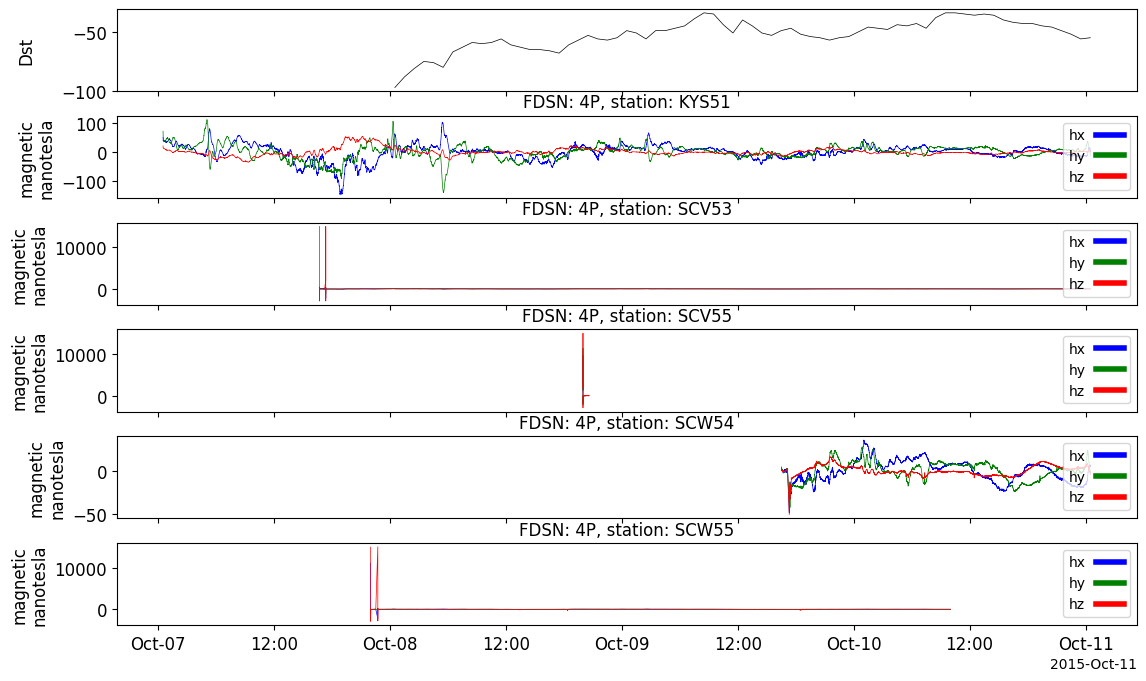

2024-07-11T22:37:43.230622-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_SCX55.h5 in mode w
2024-07-11T22:37:45.254666-0700 | CRITICAL | mth5.groups.run | update_metadata | There maybe no channels associated with this run -- setting sample_rate to 0
2024-07-11T22:37:45.481230-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:37:45.494233-0700 | INFO | mth5.groups.base | _add_group | RunGroup c already exists, returning existing group.
2024-07-11T22:37:46.445231-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_SCX55.h5


11-Jul-24 22:37:46: Creating cached c:\work\Data\SPEDAS\mth5\4P_SCX55_1446791400.0_1447137000.0.h5


2024-07-11T22:37:48.316098-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_SCX55_1446791400.0_1447137000.0.h5
2024-07-11T22:37:48.705470-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_KYR52.h5 in mode w
2024-07-11T22:37:51.070903-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:37:51.109844-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:37:52.022698-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_KYR52.h5


11-Jul-24 22:37:52: Creating cached c:\work\Data\SPEDAS\mth5\4P_KYR52_1446791400.0_1447137000.0.h5


2024-07-11T22:37:53.905180-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_KYR52_1446791400.0_1447137000.0.h5
2024-07-11T22:37:54.254355-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_OHO52.h5 in mode w
2024-07-11T22:37:56.999316-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:37:57.033383-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:37:57.922533-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_OHO52.h5


11-Jul-24 22:37:57: Creating cached c:\work\Data\SPEDAS\mth5\4P_OHO52_1446791400.0_1447137000.0.h5


2024-07-11T22:37:59.838870-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_OHO52_1446791400.0_1447137000.0.h5
2024-07-11T22:38:00.294241-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_SCY57.h5 in mode w
2024-07-11T22:38:02.106706-0700 | CRITICAL | mth5.groups.run | update_metadata | There maybe no channels associated with this run -- setting sample_rate to 0
2024-07-11T22:38:02.123702-0700 | CRITICAL | mth5.groups.run | update_metadata | There maybe no channels associated with this run -- setting sample_rate to 0
2024-07-11T22:38:02.136702-0700 | CRITICAL | mth5.groups.run | update_metadata | There maybe no channels associated with this run -- setting sample_rate to 0
2024-07-11T22:38:02.489713-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:38:02.527666-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, ret

11-Jul-24 22:38:03: Creating cached c:\work\Data\SPEDAS\mth5\4P_SCY57_1446791400.0_1447137000.0.h5


2024-07-11T22:38:05.275961-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_SCY57_1446791400.0_1447137000.0.h5
2024-07-11T22:38:05.625482-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_NCU54.h5 in mode w
2024-07-11T22:38:08.634835-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:38:08.670872-0700 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-07-11T22:38:09.375877-0700 | INFO | mth5.groups.base | _add_group | RunGroup c already exists, returning existing group.
2024-07-11T22:38:09.408876-0700 | INFO | mth5.groups.base | _add_group | RunGroup d already exists, returning existing group.
2024-07-11T22:38:09.443837-0700 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-07-11T22:38:09.480882-0700 | INFO | mth5.groups.base | _add_group | 

11-Jul-24 22:38:11: Creating cached c:\work\Data\SPEDAS\mth5\4P_NCU54_1446791400.0_1447137000.0.h5


2024-07-11T22:38:15.363036-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_NCU54_1446791400.0_1447137000.0.h5
Storm 2015-11-07 06:30:00.000000, minimum Dst: -87.0; MTH5 network 4P, stations ['SCX55', 'KYR52', 'OHO52', 'SCY57', 'NCU54']


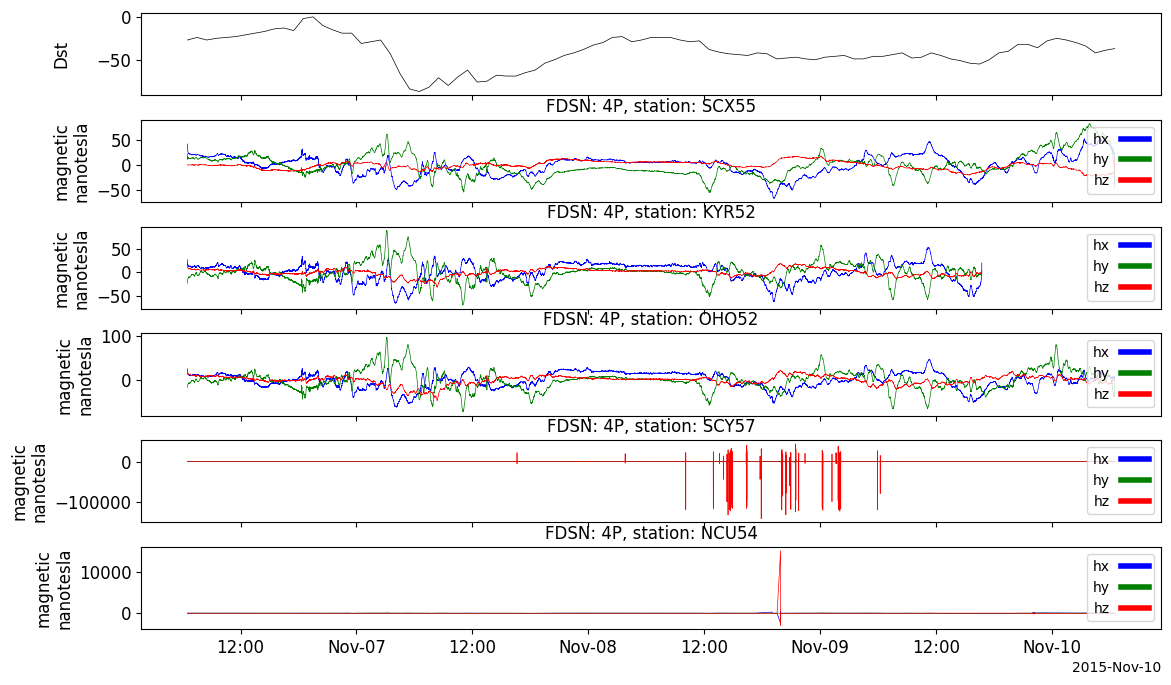

In [27]:
from pyspedas.mth5.utilities import datasets
from pyspedas.mth5.load_fdsn import load_fdsn
import random

# Prepare tplot spacing
pytplot.tplot_options('vertical_spacing', 0.3)

fmt = '%Y-%m-%dT%H:%M:%S.%f'
valid_dataset = []
for minimum_dst_time in filtered_minima_time:
    # Getting a dictionary of valid datasets for a given time range
    storm_start_time = minimum_dst_time-86400;
    storm_end_time = minimum_dst_time+3*86400
    storm_start_time_str = pytplot.time_string(storm_start_time, fmt=fmt);
    storm_end_time_str = pytplot.time_string(storm_end_time, fmt=fmt)
    valid_dataset = datasets(trange=[storm_start_time , storm_end_time])
    
    # List of all the networks
    nets = valid_dataset.keys()
    
    # If valid network is found
    if len(nets) > 0:        
        # Add dst    
        time_idx = (dst_time >= storm_start_time) & (dst_time <= storm_end_time)
        dst_storm_time = dst_time[time_idx]
        dst_storm_index = dst_index[time_idx]
        pytplot.store_data('Dst', {'x': dst_storm_time, 'y': dst_storm_index})
        
        net = list(nets)[0]
        stations = list(valid_dataset[net])
        if len(stations) > 5:
            stations = random.sample(stations, 5)  # Randomly select 5 stations
        
        fdsn_vars = ['Dst']
        for sta in stations:
           load_fdsn(network=net, station=sta, trange=[storm_start_time, storm_end_time], 
                     nodownload=True, noexception=True, nowarnings=True)   
           fdsn_vars.append(f"fdsn_{net}_{sta}")  # Combine names of the tplot variables
        
        # Print bold and blue
        print(f"\033[1m\033[34mStorm {pytplot.time_string(minimum_dst_time)}, minimum Dst: {np.min(dst_storm_index)}; MTH5 network {net}, stations {stations}\033[0m")
        pytplot.tplot(fdsn_vars)      